In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
import seaborn as sns


In [2]:
# Load the CSV file into a pandas DataFrame

df = pd.read_csv('pacifica_databas.csv', sep=';')

C:\Users\hp\AppData\Local\Temp\ipykernel_19712\1651466648.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pacifica_databas.csv', sep=';')


In [3]:
df.replace(-999, np.nan)

,Cruise:METAVAR:TEXT:21,Station,Type,yyyy-mm-ddThh:mm:ss.sss,Longitude [degrees_east],Latitude [degrees_north],Bot. Depth [m],CTDPRS [DBAR],QV:WOCEBOTTLE,CTDDEPTH [METER],...,QV:WOCEBOTTLE.23,C14ERR [/MILLE],QV:WOCEBOTTLE.24,DELHER [/MILLE],QV:WOCEBOTTLE.25,CASTNO:BYTE,QV:WOCEBOTTLE.26,BTLNBR:SHORT,QV:WOCESAMPLE,QV:ODV:SAMPLE
0,09FA20010524,1.0,B,25/05/2001,179.95821,-44.429,1011.0,997.4,2,986,...,9,NaN,9,NaN,9,1,2,10.0,2,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.3,2,987,...,9,NaN,9,NaN,9,1,2,9.0,2,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.7,2,987,...,9,NaN,9,NaN,9,1,2,21.0,2,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.7,2,987,...,9,NaN,9,NaN,9,1,2,5.0,2,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.7,2,987,...,9,NaN,9,NaN,9,1,2,2.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1098.0,2,1087,...,9,NaN,9,NaN,9,1,2,NaN,2,1
277319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1299.0,2,1285,...,9,NaN,9,NaN,9,1,2,12.0,2,1
277320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1499.0,2,1482,...,9,NaN,9,NaN,9,1,2,1.0,2,1
277321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1702.0,2,1682,...,9,NaN,9,NaN,9,1,2,3.0,2,1


In [4]:
df.head()

,Cruise:METAVAR:TEXT:21,Station,Type,yyyy-mm-ddThh:mm:ss.sss,Longitude [degrees_east],Latitude [degrees_north],Bot. Depth [m],CTDPRS [DBAR],QV:WOCEBOTTLE,CTDDEPTH [METER],...,QV:WOCEBOTTLE.23,C14ERR [/MILLE],QV:WOCEBOTTLE.24,DELHER [/MILLE],QV:WOCEBOTTLE.25,CASTNO:BYTE,QV:WOCEBOTTLE.26,BTLNBR:SHORT,QV:WOCESAMPLE,QV:ODV:SAMPLE
0,09FA20010524,1.0,B,25/05/2001,179.95821,-44.429,1011.0,997.4,2,986,...,9,NaN,9,NaN,9,1,2,10.0,2,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.3,2,987,...,9,NaN,9,NaN,9,1,2,9.0,2,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.7,2,987,...,9,NaN,9,NaN,9,1,2,21.0,2,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.7,2,987,...,9,NaN,9,NaN,9,1,2,5.0,2,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.7,2,987,...,9,NaN,9,NaN,9,1,2,2.0,2,1


In [57]:
df.shape

(277323, 68)

In [58]:
df.columns

Index(['Cruise:METAVAR:TEXT:21', 'Station', 'Type', 'yyyy-mm-ddThh:mm:ss.sss',
       'Longitude [degrees_east]', 'Latitude [degrees_north]',
       'Bot. Depth [m]', 'CTDPRS [DBAR]', 'QV:WOCEBOTTLE', 'CTDDEPTH [METER]',
       'QV:WOCEBOTTLE.1', 'CTDTMP [ITS-90]', 'QV:WOCEBOTTLE.2',
       'CTDSAL [PSS-78]', 'QV:WOCECTD', 'SALNTY [PSS-78]', 'QV:WOCEBOTTLE.3',
       'CTDOXY [UMOL/KG]', 'QV:WOCECTD.1', 'OXYGEN [UMOL/KG]',
       'QV:WOCEBOTTLE.4', 'PHSPHT [UMOL/KG]', 'QV:WOCEBOTTLE.5',
       'SILCAT [UMOL/KG]', 'QV:WOCEBOTTLE.6', 'NITRAT [UMOL/KG]',
       'QV:WOCEBOTTLE.7', 'CFC-11 [PMOL/KG]', 'QV:WOCEBOTTLE.8',
       'CFC-12 [PMOL/KG]', 'QV:WOCEBOTTLE.9', 'CCL4 [PMOL/KG]',
       'QV:WOCEBOTTLE.10', 'CFC113 [PMOL/KG]', 'QV:WOCEBOTTLE.11',
       'SF6 [FMOL/KG]', 'QV:WOCEBOTTLE.12', 'TRITUM [TU]', 'QV:WOCEBOTTLE.13',
       'DELHE3 [PERCNT]', 'QV:WOCEBOTTLE.14', 'HELIUM [NMOL/KG]',
       'QV:WOCEBOTTLE.15', 'NEON [NMOL/KG]', 'QV:WOCEBOTTLE.16',
       'ALKALI [UMOL/KG]', 'QV:WOCEBO

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277323 entries, 0 to 277322
Data columns (total 68 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cruise:METAVAR:TEXT:21    10631 non-null   object 
 1   Station                   10631 non-null   object 
 2   Type                      10631 non-null   object 
 3   yyyy-mm-ddThh:mm:ss.sss   10631 non-null   object 
 4   Longitude [degrees_east]  10631 non-null   float64
 5   Latitude [degrees_north]  10631 non-null   float64
 6   Bot. Depth [m]            10631 non-null   float64
 7   CTDPRS [DBAR]             277323 non-null  float64
 8   QV:WOCEBOTTLE             277323 non-null  int64  
 9   CTDDEPTH [METER]          277323 non-null  int64  
 10  QV:WOCEBOTTLE.1           277323 non-null  int64  
 11  CTDTMP [ITS-90]           277323 non-null  float64
 12  QV:WOCEBOTTLE.2           277323 non-null  int64  
 13  CTDSAL [PSS-78]           252155 non-null  f

In [6]:
df.describe()

,Longitude [degrees_east],Latitude [degrees_north],Bot. Depth [m],CTDPRS [DBAR],QV:WOCEBOTTLE,CTDDEPTH [METER],QV:WOCEBOTTLE.1,CTDTMP [ITS-90],QV:WOCEBOTTLE.2,CTDSAL [PSS-78],...,QV:WOCEBOTTLE.23,C14ERR [/MILLE],QV:WOCEBOTTLE.24,DELHER [/MILLE],QV:WOCEBOTTLE.25,CASTNO:BYTE,QV:WOCEBOTTLE.26,BTLNBR:SHORT,QV:WOCESAMPLE,QV:ODV:SAMPLE
count,10631.000000,10631.000000,10631.000000,277323.000000,277323.0,277323.000000,277323.0,277323.000000,277323.0,252155.000000,...,277323.000000,19348.000000,277323.000000,6580.000000,277323.000000,277323.000000,277323.0,163696.000000,277323.000000,277323.0
mean,181.701675,14.523481,4097.071865,1227.780566,2.0,1208.058535,2.0,8.231947,2.0,34.510246,...,8.632436,-1.190201,8.318181,0.147266,8.583619,2.624755,2.0,1106.819556,4.157437,1.0
std,39.110826,31.818149,1595.855103,1387.856489,0.0,1358.823550,0.0,8.428739,0.0,0.616801,...,1.561363,6.350128,2.075541,0.073038,1.655688,10.358560,0.0,3263.813467,3.057179,0.0
min,120.889500,-70.999500,-9.000000,0.000000,2.0,0.000000,2.0,-1.873000,2.0,11.928600,...,2.000000,-9.000000,2.000000,0.080000,2.000000,1.000000,2.0,-9.000000,1.000000,1.0
25%,147.975995,-5.005650,3377.500000,150.900000,2.0,150.000000,2.0,1.949600,2.0,34.381199,...,9.000000,-9.000000,9.000000,0.110000,9.000000,1.000000,2.0,7.000000,2.000000,1.0
50%,172.766200,22.383300,4452.000000,699.000000,2.0,692.000000,2.0,4.349600,2.0,34.605301,...,9.000000,2.800000,9.000000,0.150000,9.000000,1.000000,2.0,18.000000,2.000000,1.0
75%,209.516655,36.670700,5291.000000,1922.950000,2.0,1896.000000,2.0,12.499750,2.0,34.696301,...,9.000000,3.600000,9.000000,0.150000,9.000000,1.000000,2.0,42.000000,9.000000,1.0
max,288.499690,80.227700,10020.000000,6904.100000,2.0,6703.000000,2.0,35.150000,2.0,39.141701,...,9.000000,30.900000,9.000000,3.590000,9.000000,194.000000,2.0,12914.000000,9.000000,1.0


In [7]:
df = df.filter(items=['CTDTMP [ITS-90]','OXYGEN [UMOL/KG]','CTDSAL [PSS-78]', 'TCARBN [UMOL/KG]', 'ALKALI [UMOL/KG]', 'PHSPHT [UMOL/KG]', 'SILCAT [UMOL/KG]', 'CTDPRS [DBAR]','NITRAT [UMOL/KG]', 'PH'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277323 entries, 0 to 277322
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CTDTMP [ITS-90]   277323 non-null  float64
 1   OXYGEN [UMOL/KG]  239609 non-null  float64
 2   CTDSAL [PSS-78]   252155 non-null  float64
 3   TCARBN [UMOL/KG]  102306 non-null  float64
 4   ALKALI [UMOL/KG]  76898 non-null   float64
 5   PHSPHT [UMOL/KG]  230945 non-null  float64
 6   SILCAT [UMOL/KG]  218789 non-null  float64
 7   CTDPRS [DBAR]     277323 non-null  float64
 8   NITRAT [UMOL/KG]  233013 non-null  float64
 9   PH                83278 non-null   float64
dtypes: float64(10)
memory usage: 21.2 MB


In [9]:
df.isnull().sum()

CTDTMP [ITS-90]          0
OXYGEN [UMOL/KG]     37714
CTDSAL [PSS-78]      25168
TCARBN [UMOL/KG]    175017
ALKALI [UMOL/KG]    200425
PHSPHT [UMOL/KG]     46378
SILCAT [UMOL/KG]     58534
CTDPRS [DBAR]            0
NITRAT [UMOL/KG]     44310
PH                  194045
dtype: int64

In [10]:
df.head()

,CTDTMP [ITS-90],OXYGEN [UMOL/KG],CTDSAL [PSS-78],TCARBN [UMOL/KG],ALKALI [UMOL/KG],PHSPHT [UMOL/KG],SILCAT [UMOL/KG],CTDPRS [DBAR],NITRAT [UMOL/KG],PH
0,4.547,NaN,NaN,NaN,NaN,NaN,NaN,997.4,NaN,NaN
1,4.533,NaN,NaN,NaN,NaN,NaN,NaN,998.3,NaN,NaN
2,4.536,NaN,NaN,NaN,NaN,NaN,NaN,998.7,NaN,NaN
3,4.536,NaN,NaN,NaN,NaN,NaN,NaN,998.7,NaN,NaN
4,4.536,NaN,NaN,NaN,NaN,NaN,NaN,998.7,NaN,NaN


In [11]:
corr_matrix = df.corr()

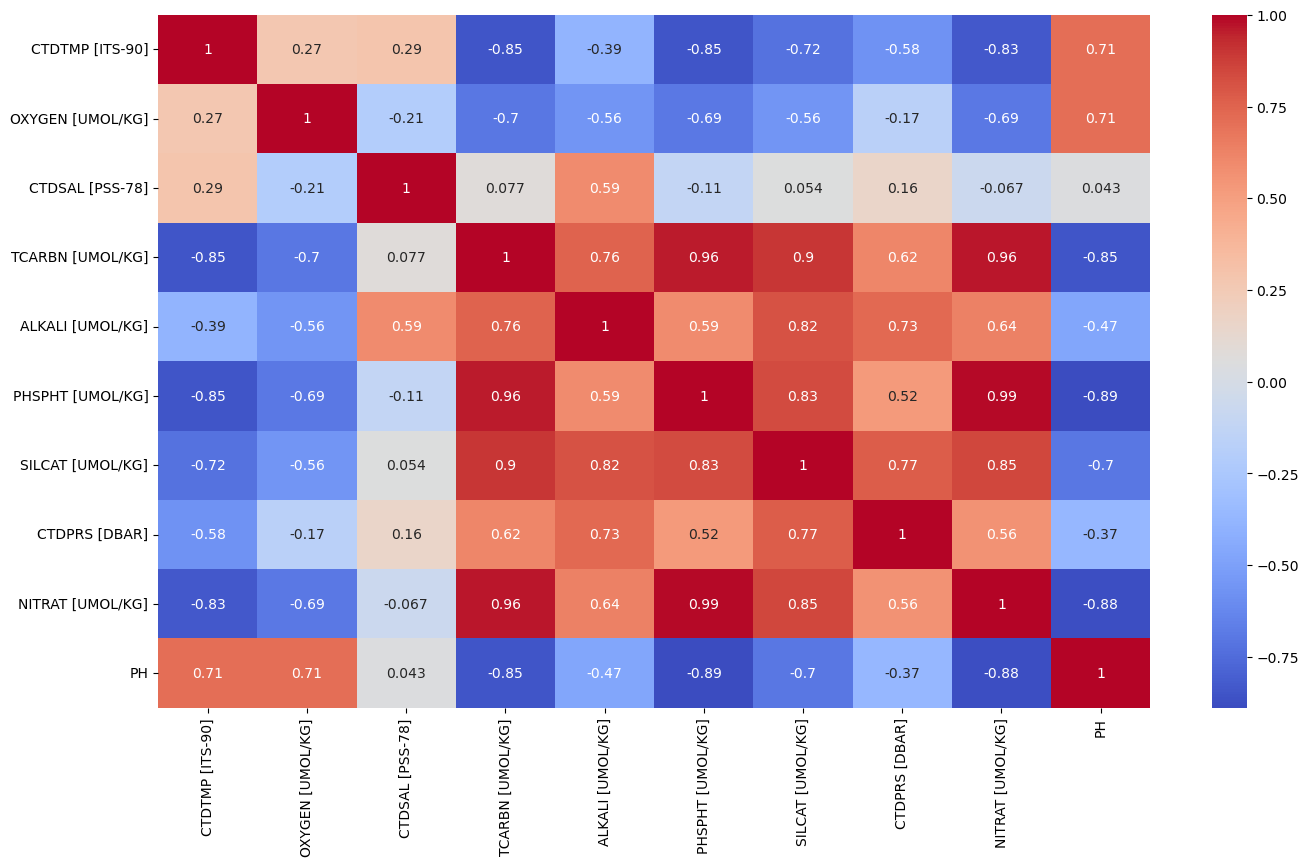

In [12]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(16,9)
plt.show()

# KNN_remplaire les valeures nulles

In [68]:

features = df.drop('PH', axis=1)
target = df['PH']
knn_imputer = KNNImputer(n_neighbors=5)
features_imputed = knn_imputer.fit_transform(features)

In [69]:

dataset_imputed = pd.DataFrame(features_imputed, columns=features.columns)
dataset_imputed['PH'] = target


In [70]:
dataset_imputed

,CTDTMP [ITS-90],OXYGEN [UMOL/KG],CTDSAL [PSS-78],TCARBN [UMOL/KG],ALKALI [UMOL/KG],PHSPHT [UMOL/KG],SILCAT [UMOL/KG],CTDPRS [DBAR],NITRAT [UMOL/KG],PH
0,4.547,119.10,34.547339,2286.68,2356.26,2.824,70.516,997.4,37.126,NaN
1,4.533,100.64,34.497660,2290.58,2348.82,2.744,71.046,998.3,38.908,NaN
2,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,NaN
3,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,NaN
4,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,NaN
...,...,...,...,...,...,...,...,...,...,...
277318,3.494,67.60,34.432999,2290.04,2359.24,2.880,120.580,1098.0,41.750,NaN
277319,2.898,82.60,34.512001,2325.14,2374.28,2.780,129.890,1299.0,40.660,NaN
277320,2.621,99.60,34.558998,2342.30,2384.66,2.770,133.730,1499.0,40.110,NaN
277321,2.339,115.70,34.598000,2347.40,2404.94,2.710,136.900,1702.0,39.560,NaN


In [71]:
corr_matrix = df.corr()

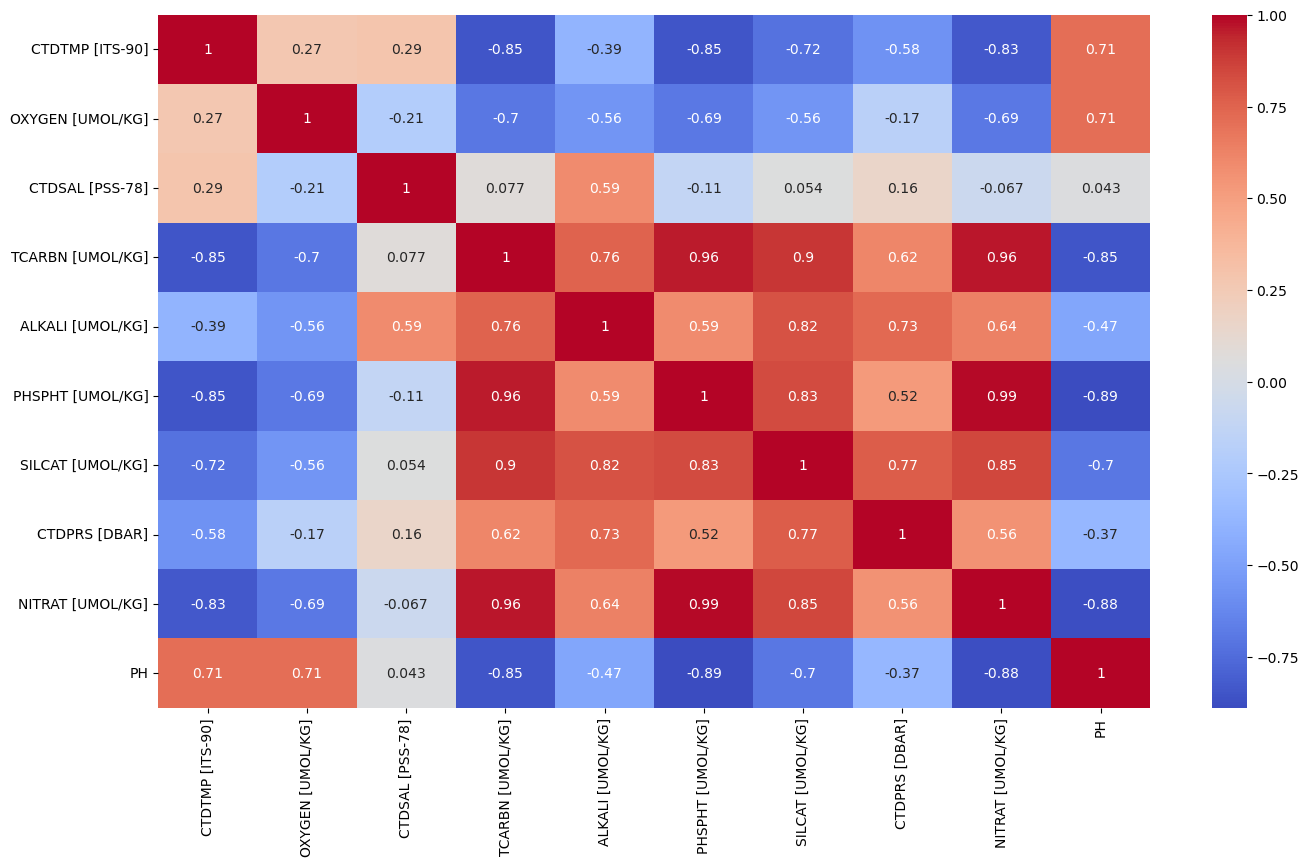

In [72]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(16,9)
plt.show()

# Remplire les valeures nulles de PH avec Equation

In [20]:
from ph_classes.CalculpHfromTATC import CalculpHfromTATC


In [73]:
for i,row in dataset_imputed.iterrows():
    if pd.isnull(row['PH']):
        ph=CalculpHfromTATC(row['TCARBN [UMOL/KG]'],row['ALKALI [UMOL/KG]'],row['CTDSAL [PSS-78]'],1,row['CTDTMP [ITS-90]'],1,row['CTDPRS [DBAR]'],row['PHSPHT [UMOL/KG]'],row['SILCAT [UMOL/KG]'],1,2)-0.24
        dataset_imputed.at[i,'PH']=ph

In [74]:
dataset_imputed

,CTDTMP [ITS-90],OXYGEN [UMOL/KG],CTDSAL [PSS-78],TCARBN [UMOL/KG],ALKALI [UMOL/KG],PHSPHT [UMOL/KG],SILCAT [UMOL/KG],CTDPRS [DBAR],NITRAT [UMOL/KG],PH
0,4.547,119.10,34.547339,2286.68,2356.26,2.824,70.516,997.4,37.126,7.552423
1,4.533,100.64,34.497660,2290.58,2348.82,2.744,71.046,998.3,38.908,7.518387
2,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,7.514944
3,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,7.514944
4,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,7.514944
...,...,...,...,...,...,...,...,...,...,...
277318,3.494,67.60,34.432999,2290.04,2359.24,2.880,120.580,1098.0,41.750,7.565329
277319,2.898,82.60,34.512001,2325.14,2374.28,2.780,129.890,1299.0,40.660,7.508111
277320,2.621,99.60,34.558998,2342.30,2384.66,2.770,133.730,1499.0,40.110,7.487689
277321,2.339,115.70,34.598000,2347.40,2404.94,2.710,136.900,1702.0,39.560,7.536210


In [81]:
dataset_imputed.to_csv('dataKNN.csv',index=False)